Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model loaded from Google Drive!


Saving imag1es.jpg to imag1es (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


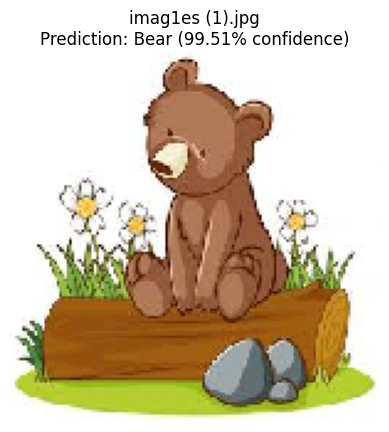

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load model from Drive (correct path to .h5 file)
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/panda_bear_classifier.h5')
print("Model loaded from Google Drive!")

# Upload images to predict
from google.colab import files
uploaded = files.upload()

# Predict and visualize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = (150, 150)
class_names = ['Bear', 'Panda']

for img_name in uploaded.keys():
    img = image.load_img(img_name, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0][0]
    label_index = int(pred > 0.5)
    label = class_names[label_index]
    confidence = pred if label_index == 1 else 1 - pred

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{img_name}\nPrediction: {label} ({confidence*100:.2f}% confidence)")
    plt.show()
